In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading and Pre-Processing
---
In the below cells we load the journals dataset as a pandas dataframe. The we clean the dataset like removing missing values and removing enteries which does not make any sense or the enteries on no mathematical operation can be performed.
After we are done the cleaning part, we will standardize our dataset, by standardizing we bring all the features/variables on a similar scale.

In [94]:
PATH = "/content/drive/MyDrive/Thesis-work_overall/Overall_Ranking_6metrics/Data_inner2021.csv" # just change this path to your file path

In [95]:
df_o = pd.read_csv(PATH)
df_o.head()

Issn                                              Title  \
0             1628828  ieee transactions on pattern analysis and mach...   
1  15540669, 15540677    foundations and trends in information retrieval   
2             2684012    international journal of information management   
3            1089778X      ieee transactions on evolutionary computation   
4             1636804                       ieee communications magazine   

   CiteScore   SNIP    SJR  H index      IF       ES SJR Best Quartile  \
0       36.6  7.338  8,269      377  24.314  0.06637                Q1   
1       30.5  6.543  3,343       35  13.286  0.00057                Q1   
2       28.8  5.416  4,584      132  18.958  0.01601                Q1   
3       25.7  5.617  6,078      186  16.497  0.01134                Q1   
4       24.6  3.542  5,147      260   9.030  0.03189                Q1   

  HJRS Category  
0             W  
1             W  
2             W  
3             W  
4             W

In [96]:
df_c = df_o[['Issn', 'Title', 'CiteScore', 'SNIP', 'SJR', 'H index', 'IF', 'ES', 'SJR Best Quartile', 'HJRS Category']]
df_c

Issn                                              Title  \
0               1628828  ieee transactions on pattern analysis and mach...   
1    15540669, 15540677    foundations and trends in information retrieval   
2               2684012    international journal of information management   
3              1089778X      ieee transactions on evolutionary computation   
4               1636804                       ieee communications magazine   
..                  ...                                                ...   
642  16083261, 03617688                  programming and computer software   
643  14325217, 14322994        mathematical methods of operations research   
644             1676377                        operations research letters   
645            15423980  journal of multiple-valued logic and soft comp...   
646  14697653, 09567968                  journal of functional programming   

     CiteScore   SNIP    SJR  H index      IF       ES SJR Best Quartile  \
0         36.6  7.338  8,269      377  24.314  0.06637                Q1   
1         30.5  6.543  3,343       35  13.286  0.00057                Q1   
2         28.8  5.416  4,584      132  18.958  0.01601                Q1   
3         25.7  5.617  6,078      186  16.497  0.01134                Q1   
4         24.6  3.542  5,147      260   9.030  0.03189                Q1   
..         ...    ...    ...      ...     ...      ...               ...   
642        1.9  1.096  0,367       20   0.801  0.00027                Q3   
643        1.8  0.862  0,573       49   1.337  0.00146                Q3   
644        1.8  0.974  0,718       77   1.151  0.00370                Q2   
645        1.5  0.499  0,234       25   0.780  0.00034                Q4   
646        1.1  1.131  1,352       52   1.543  0.00108                Q1   

    HJRS Category  
0               W  
1               W  
2               W  
3               W  
4               W  
..            ...  
642             X  
643             X  
644             W  
645             Y  
646             W  

[647 rows x 10 columns]

In [97]:
df_c = df_c[df_c != '-'].dropna()
df_c

Issn                                              Title  \
0               1628828  ieee transactions on pattern analysis and mach...   
1    15540669, 15540677    foundations and trends in information retrieval   
2               2684012    international journal of information management   
3              1089778X      ieee transactions on evolutionary computation   
4               1636804                       ieee communications magazine   
..                  ...                                                ...   
642  16083261, 03617688                  programming and computer software   
643  14325217, 14322994        mathematical methods of operations research   
644             1676377                        operations research letters   
645            15423980  journal of multiple-valued logic and soft comp...   
646  14697653, 09567968                  journal of functional programming   

     CiteScore   SNIP    SJR  H index      IF       ES SJR Best Quartile  \
0         36.6  7.338  8,269      377  24.314  0.06637                Q1   
1         30.5  6.543  3,343       35  13.286  0.00057                Q1   
2         28.8  5.416  4,584      132  18.958  0.01601                Q1   
3         25.7  5.617  6,078      186  16.497  0.01134                Q1   
4         24.6  3.542  5,147      260   9.030  0.03189                Q1   
..         ...    ...    ...      ...     ...      ...               ...   
642        1.9  1.096  0,367       20   0.801  0.00027                Q3   
643        1.8  0.862  0,573       49   1.337  0.00146                Q3   
644        1.8  0.974  0,718       77   1.151  0.00370                Q2   
645        1.5  0.499  0,234       25   0.780  0.00034                Q4   
646        1.1  1.131  1,352       52   1.543  0.00108                Q1   

    HJRS Category  
0               W  
1               W  
2               W  
3               W  
4               W  
..            ...  
642             X  
643             X  
644             W  
645             Y  
646             W  

[644 rows x 10 columns]

In [98]:
row, col = df_c.shape
print(f'There are {row} rows and {col} columns')

There are 644 rows and 10 columns


In [99]:
# dropping fist two columns (ISSN, Title) as they don't contain any useful info
df_c["SJR"] = df_c["SJR"].str.replace(",", ".")
#there is '-' in our columns, so we are dropping those rows which contain this, two rows dropped
df_c = df_c[df_c != '-'].dropna()
df = df_c.iloc[:, 2:8]

df.shape, df_c.shape

((644, 6), (644, 10))

In [100]:
df.head()

CiteScore   SNIP    SJR  H index      IF       ES
0       36.6  7.338  8.269      377  24.314  0.06637
1       30.5  6.543  3.343       35  13.286  0.00057
2       28.8  5.416  4.584      132  18.958  0.01601
3       25.7  5.617  6.078      186  16.497  0.01134
4       24.6  3.542  5.147      260   9.030  0.03189

In [101]:
"""
Standardization is used to bring all the variables on the same scale. means every variable will have values
in range 0-1
"""
sc = MinMaxScaler()
sc.fit(df.values)
scaled_data = sc.fit_transform(df.values)

In [102]:
scaled_data

array([[1.        , 0.93890928, 1.        , 0.90663391, 0.82972833,
        0.26598476],
       [0.83008357, 0.83468799, 0.39587932, 0.06633907, 0.4480706 ,
        0.00204573],
       [0.78272981, 0.68694284, 0.54807456, 0.3046683 , 0.64436754,
        0.06397914],
       ...,
       [0.03064067, 0.10461458, 0.07395143, 0.16953317, 0.02810175,
        0.01460088],
       [0.02228412, 0.042344  , 0.01459406, 0.04176904, 0.01526216,
        0.00112314],
       [0.01114206, 0.12519664, 0.15170468, 0.10810811, 0.04166811,
        0.00409146]])

## Elbow Method

Below we apply the elbow method on our dataset. Elbow method is used to compute the optimal number of clusters for our dataset. Below we run the Kmeans algorithm for different number of clusters from 1 to 9. Where our curve stops decreasing or it starts flattening, that we choose our number of clusters. From below 4 or 5 can be optimal number of clusters.

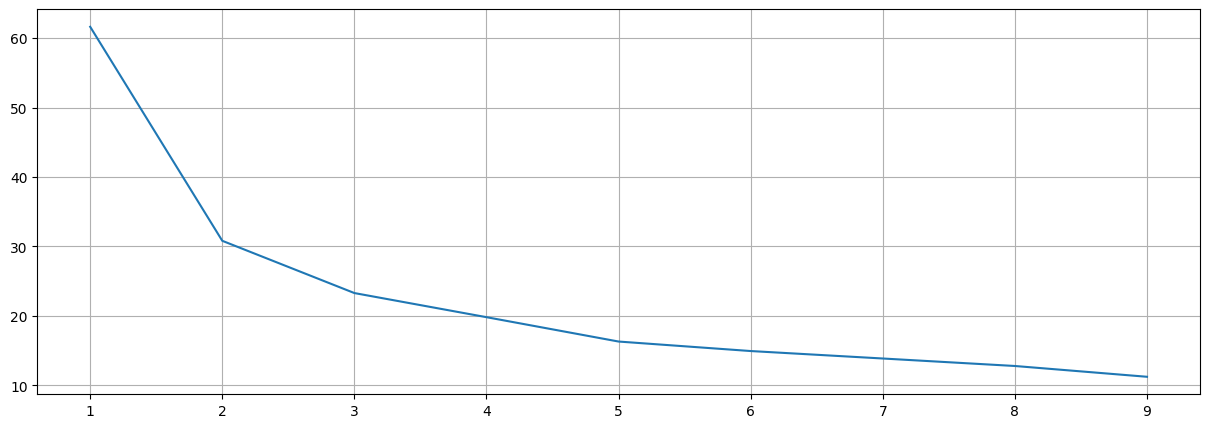

In [103]:
"""
We will use inertia method to find optimal number of clusters.
Look it up, within cluster sum of squares
"""
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
# plt.title('Elbow curve')

In [104]:
def fit_kmeans(data, n_features: int = 6):
  model = KMeans(n_clusters=4)
  new_data = data[:, :n_features]
  model.fit(new_data)
  yhat = model.predict(new_data)
  clusters = np.unique(yhat)

  for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(scaled_data[row_ix, 0], scaled_data[row_ix, 1]) # we can choose different columns here 0, 1, try different combinations
  plt.show();
  return yhat

In [105]:
df_o.columns

Index(['Issn', 'Title', 'CiteScore', 'SNIP', 'SJR', 'H index', 'IF', 'ES',
       'SJR Best Quartile', 'HJRS Category'],
      dtype='object')

# Below we will fit kmeans using different number of features.
Clustering using only frist two features i-e Cite_score and SNIP

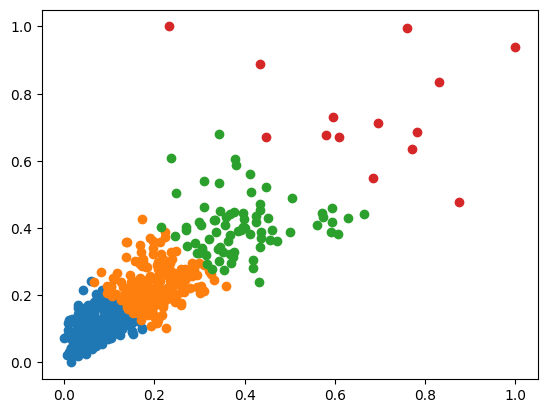

In [106]:
yhat2 = fit_kmeans(scaled_data, n_features=2)

Clustering using only frist three features i-e Cite_score SNIP and SJR

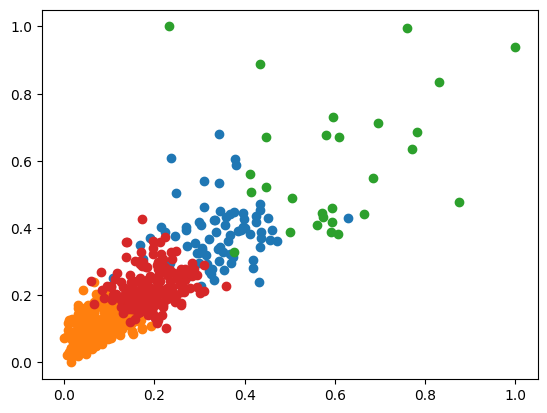

In [107]:
yhat3 = fit_kmeans(scaled_data, n_features=3)

lustering using frist four features

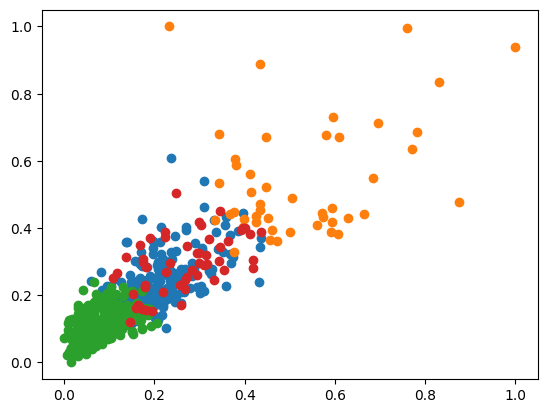

In [108]:
yhat4 = fit_kmeans(scaled_data, n_features=4)

Clustering using first 5 features

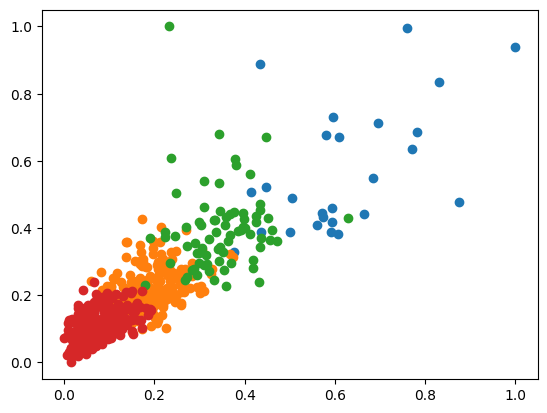

In [109]:
yhat5 = fit_kmeans(scaled_data, n_features=5)

Clustering using all 6 features

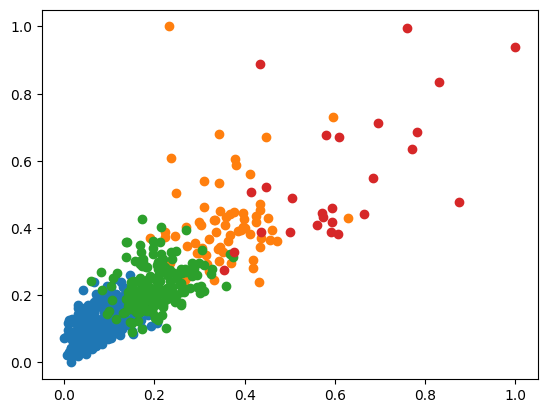

In [110]:
yhat6 = fit_kmeans(scaled_data) # here we don't need to specify n_feature because they are 6 by default

Now we will choose the yhat which best clusters our dataset.

In [111]:
df_c["KMeanslabels"] = yhat6

In [112]:
df_c.head()

Issn                                              Title  \
0             1628828  ieee transactions on pattern analysis and mach...   
1  15540669, 15540677    foundations and trends in information retrieval   
2             2684012    international journal of information management   
3            1089778X      ieee transactions on evolutionary computation   
4             1636804                       ieee communications magazine   

   CiteScore   SNIP    SJR  H index      IF       ES SJR Best Quartile  \
0       36.6  7.338  8.269      377  24.314  0.06637                Q1   
1       30.5  6.543  3.343       35  13.286  0.00057                Q1   
2       28.8  5.416  4.584      132  18.958  0.01601                Q1   
3       25.7  5.617  6.078      186  16.497  0.01134                Q1   
4       24.6  3.542  5.147      260   9.030  0.03189                Q1   

  HJRS Category  KMeanslabels  
0             W             3  
1             W             3  
2             W             3  
3             W             3  
4             W             3

In [113]:
df_c.to_csv("/content/drive/MyDrive/Thesis-work_overall/Overall_Ranking_6metrics/kmeansdata.csv", index=False)

# PCA

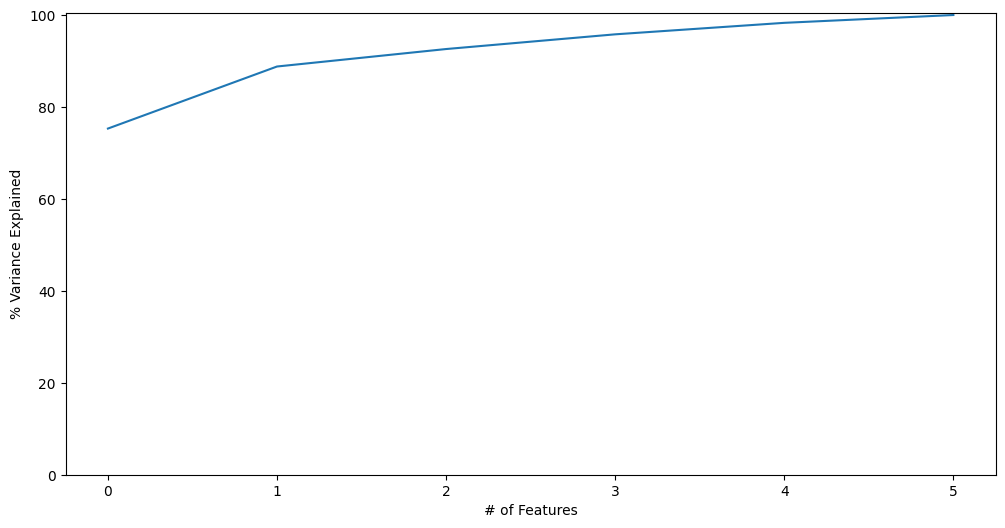

In [114]:

#n_components=6 because we have 6 features in the dataset
pca = PCA(n_components=6)
pca.fit(scaled_data)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
# plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)



In [115]:
pca = PCA(n_components=2)
pca_scale = pca.fit_transform(scaled_data)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2'])
print(pca.explained_variance_ratio_)

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])


[0.75280987 0.13467524]


Text(0, 0.5, 'Inertia')

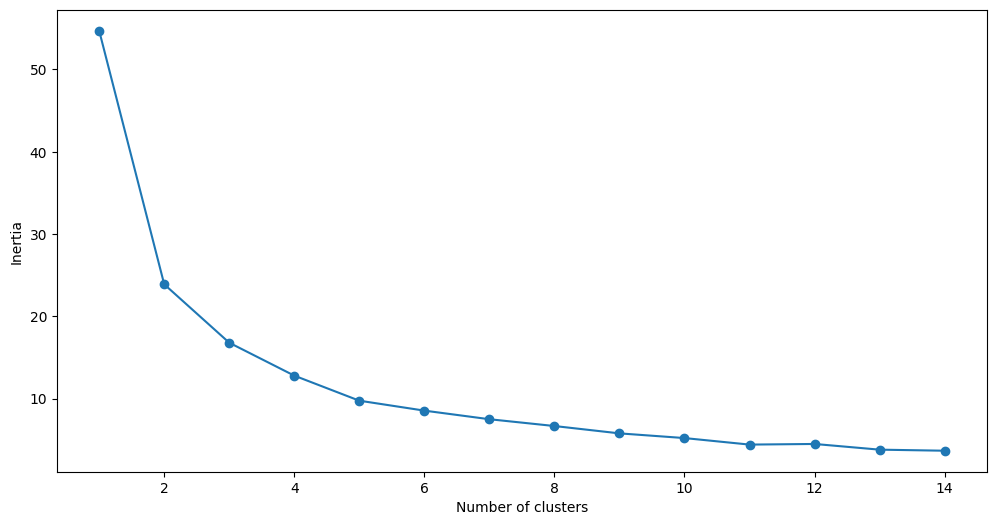

In [116]:
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
#plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


KMeans PCA Scaled Silhouette Score: 0.44935749297387056


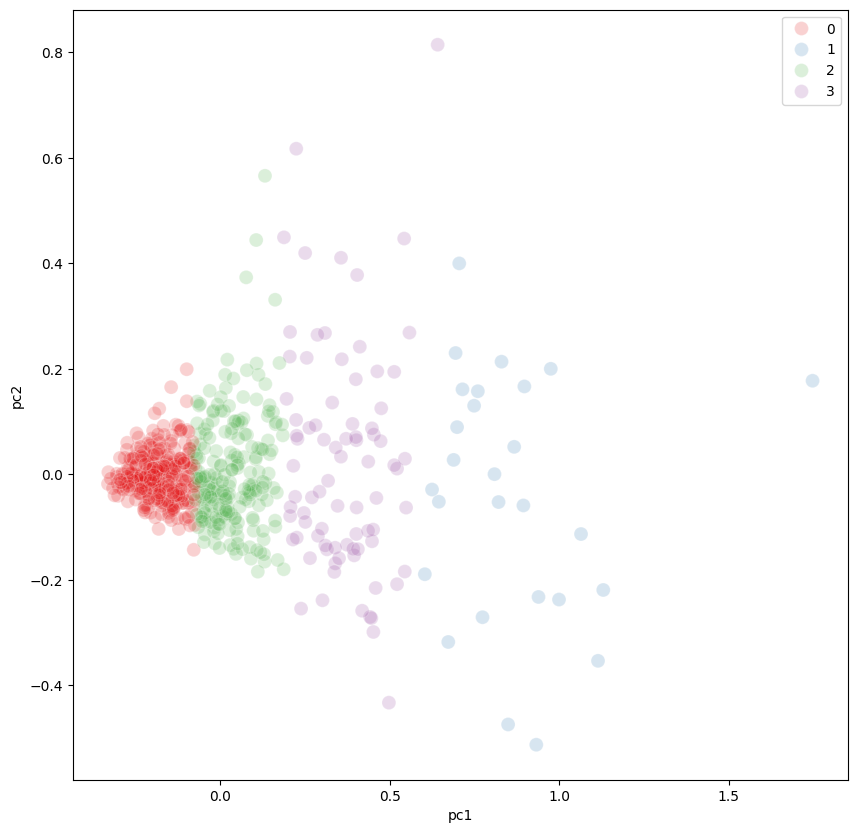

In [117]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
labels_pca_scale
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)


plt.figure(figsize = (10,10))
# Pass data as a single argument and specify x and y columns using keyword arguments
sns.scatterplot(data=clusters_pca_scale, x='pc1', y='pc2', hue='pca_clusters', palette='Set1', s=100, alpha=0.2)
plt.legend()
plt.show()

In [118]:
clusters_pca_scale

pc1       pc2  pca_clusters
0    1.747259  0.177366             1
1    0.849071 -0.474180             1
2    0.999227 -0.237381             1
3    1.064191 -0.113229             1
4    0.829672  0.213479             1
..        ...       ...           ...
639 -0.249824 -0.047844             0
640 -0.221009  0.019274             0
641 -0.183893  0.075697             0
642 -0.296040 -0.009995             0
643 -0.162879  0.014811             0

[644 rows x 3 columns]

In [119]:
labels_pca_scale

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [120]:
df_c["PCA2_labels"] = labels_pca_scale

df_c.head()
df_c.to_csv("/content/drive/MyDrive/Thesis-work_overall/Overall_Ranking_6metrics/PCA2_clustered_full_dataset.csv", index=False)

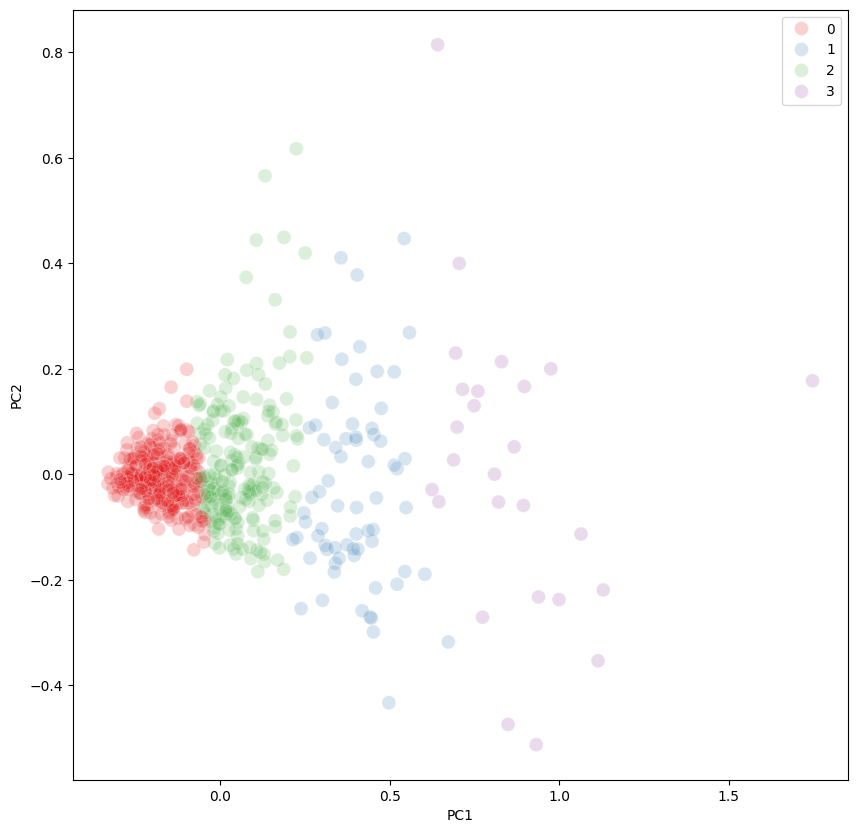

In [121]:
pca2 = PCA(n_components=2).fit(scaled_data)
pca2d = pca2.transform(scaled_data)
plt.figure(figsize = (10,10))
# Create a DataFrame for scatterplot
pca_df = pd.DataFrame(pca2d, columns=['PC1', 'PC2'])
pca_df['cluster'] = yhat6
# Use the DataFrame with 'x', 'y', and 'hue'
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set1', s=100, alpha=0.2)   #.set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

KMeans PCA (3D) Scaled Silhouette Score: 0.42042615511822196


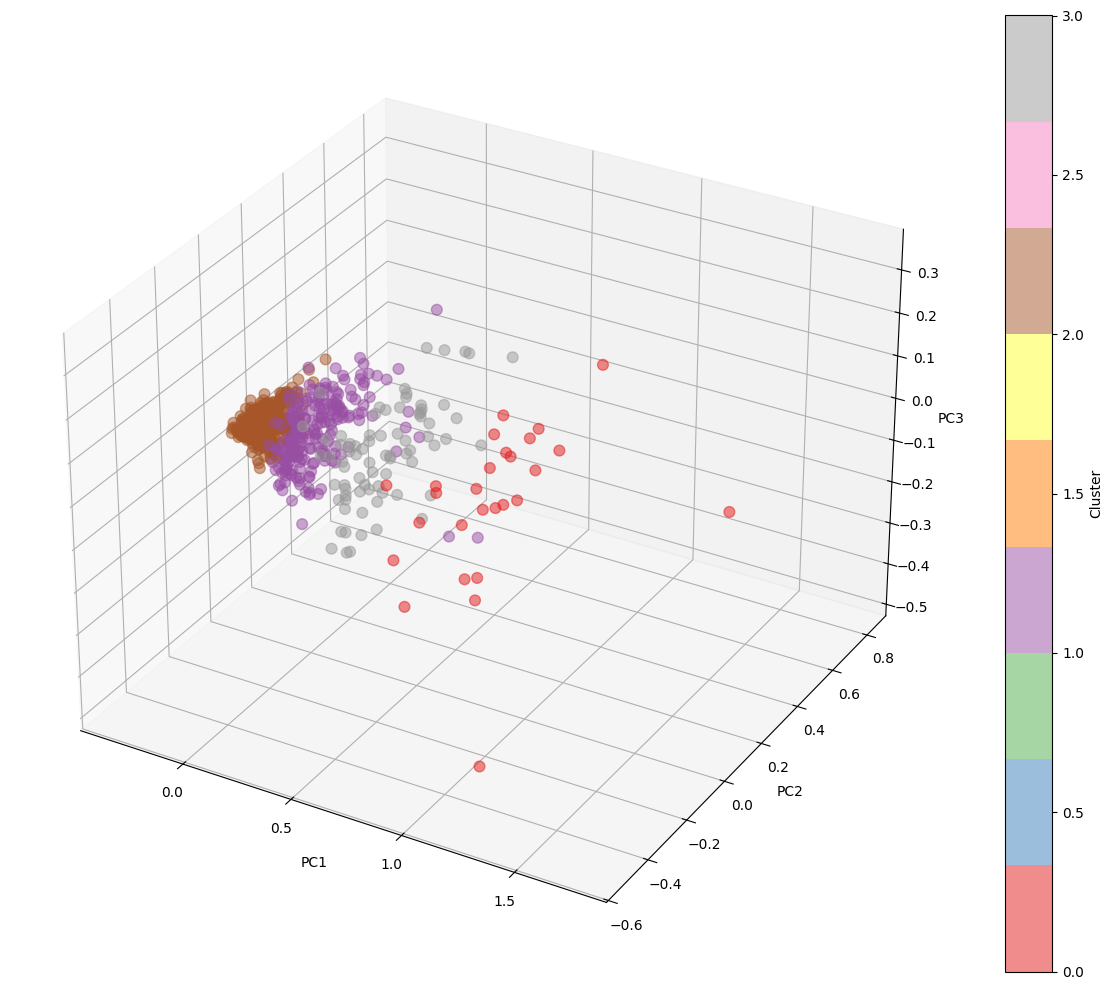

In [122]:
# Apply 3D PCA
pca_3d = PCA(n_components=3)
pca_components = pca_3d.fit_transform(scaled_data)

# Create DataFrame for PCA components
pca_df_scale_3d = pd.DataFrame(data=pca_components, columns=['pc1', 'pc2', 'pc3'])

# Apply KMeans
kmeans_pca_scale_3d = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale_3d)

# Print silhouette score
print('KMeans PCA (3D) Scaled Silhouette Score: {}'.format(
    silhouette_score(pca_df_scale_3d, kmeans_pca_scale_3d.labels_, metric='euclidean')))

# Assign labels and combine with PCA data
labels_pca_scale_3d = kmeans_pca_scale_3d.labels_
clusters_pca_scale_3d = pd.concat([pca_df_scale_3d, pd.DataFrame({'pca_clusters': labels_pca_scale_3d})], axis=1)

# Plotting in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use scatter with coloring by cluster
scatter = ax.scatter(
    clusters_pca_scale_3d['pc1'],
    clusters_pca_scale_3d['pc2'],
    clusters_pca_scale_3d['pc3'],
    c=clusters_pca_scale_3d['pca_clusters'],
    cmap='Set1',
    s=60,
    alpha=0.5
)

# ax.set_title('KMeans Clusters (4) Derived from 3D PCA', fontsize=15)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.show()


In [123]:
clusters_pca_scale_3d

pc1       pc2       pc3  pca_clusters
0    1.747259  0.177366  0.004866             0
1    0.849071 -0.474180  0.026967             0
2    0.999227 -0.237381 -0.089738             0
3    1.064191 -0.113229  0.047482             0
4    0.829672  0.213479  0.024959             0
..        ...       ...       ...           ...
639 -0.249824 -0.047844  0.016079             2
640 -0.221009  0.019274  0.010598             2
641 -0.183893  0.075697  0.039077             2
642 -0.296040 -0.009995 -0.023078             2
643 -0.162879  0.014811  0.040451             2

[644 rows x 4 columns]

In [124]:
labels_pca_scale_3d

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [125]:
df_c["PCA3_labels"] = labels_pca_scale_3d

df_c.head()
df_c.to_csv("/content/drive/MyDrive/Thesis-work_overall/Overall_Ranking_6metrics/PCA3_clustered_full_dataset.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 644 samples in 0.001s...
[t-SNE] Computed neighbors for 644 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 644 / 644
[t-SNE] Mean sigma: 0.053123
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.224617
[t-SNE] KL divergence after 1300 iterations: 0.441384


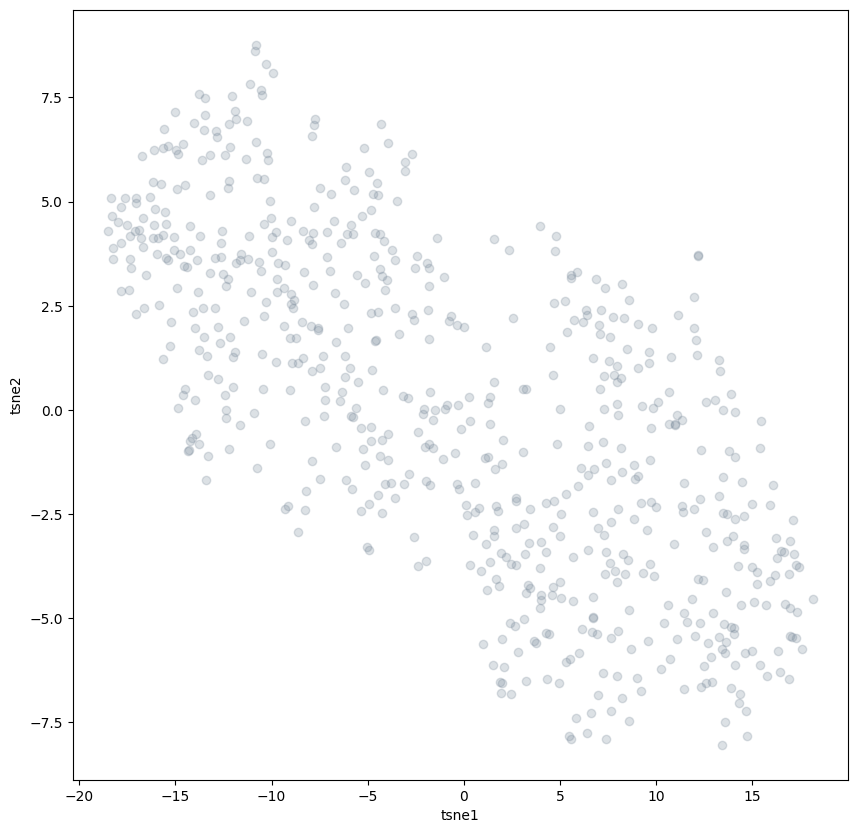

In [126]:
# t-SNE for 2
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(scaled_data)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 644 samples in 0.001s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computed neighbors for 644 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 644 / 644
[t-SNE] Mean sigma: 0.053123
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.723167
[t-SNE] KL divergence after 2350 iterations: 0.273094


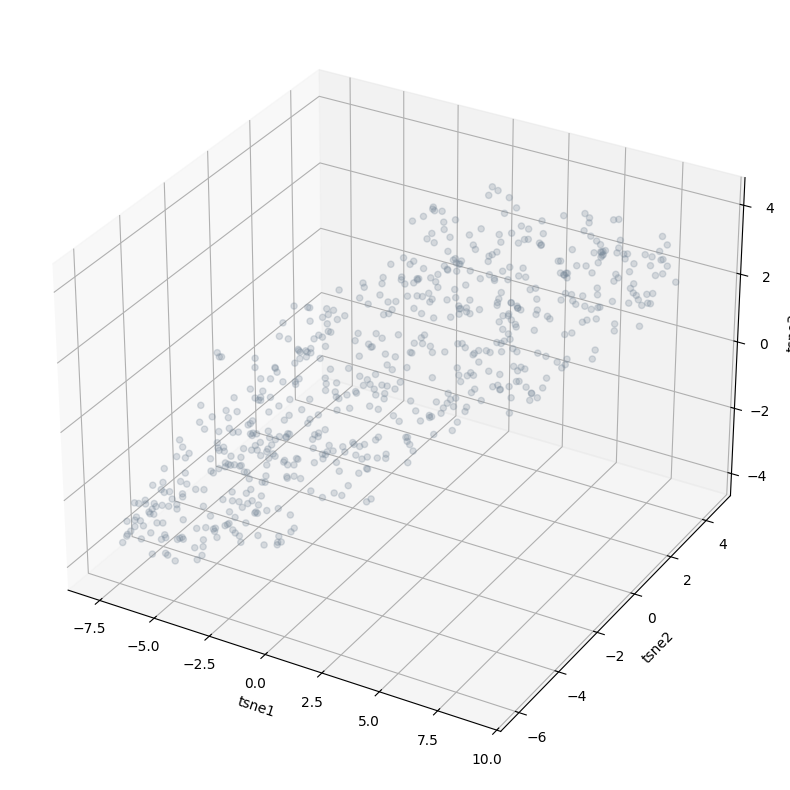

In [127]:
# t-SNE for 3D
tsne_3d = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_3d_results = tsne_3d.fit_transform(scaled_data)

# Convert to DataFrame
tsne_df_3d = pd.DataFrame(tsne_3d_results, columns=['tsne1', 'tsne2', 'tsne3'])

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_3d['tsne1'], tsne_df_3d['tsne2'], tsne_df_3d['tsne3'], alpha=0.25, color='lightslategray')
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_zlabel('tsne3')
plt.show()


In [128]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])

Text(0, 0.5, 'Inertia')

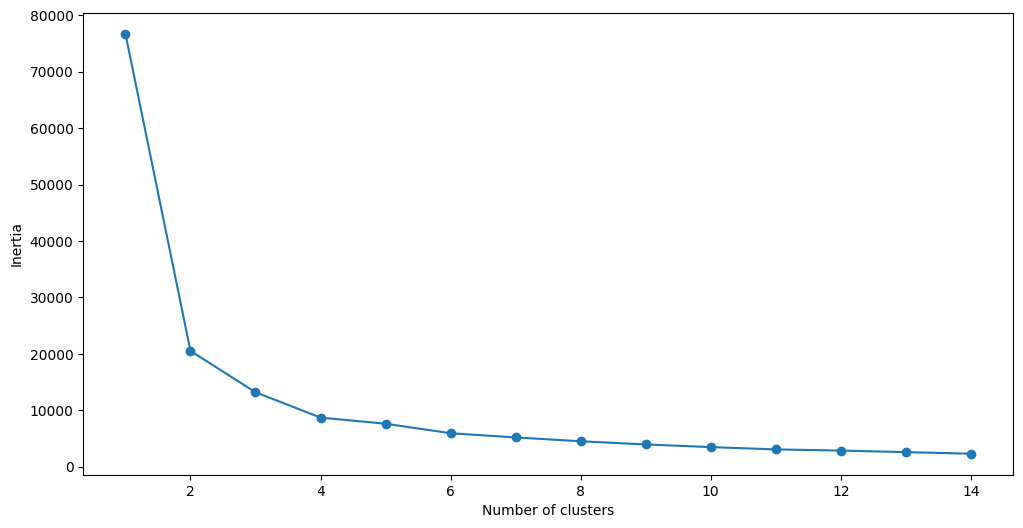

In [129]:
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
# plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [130]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.44172587990760803


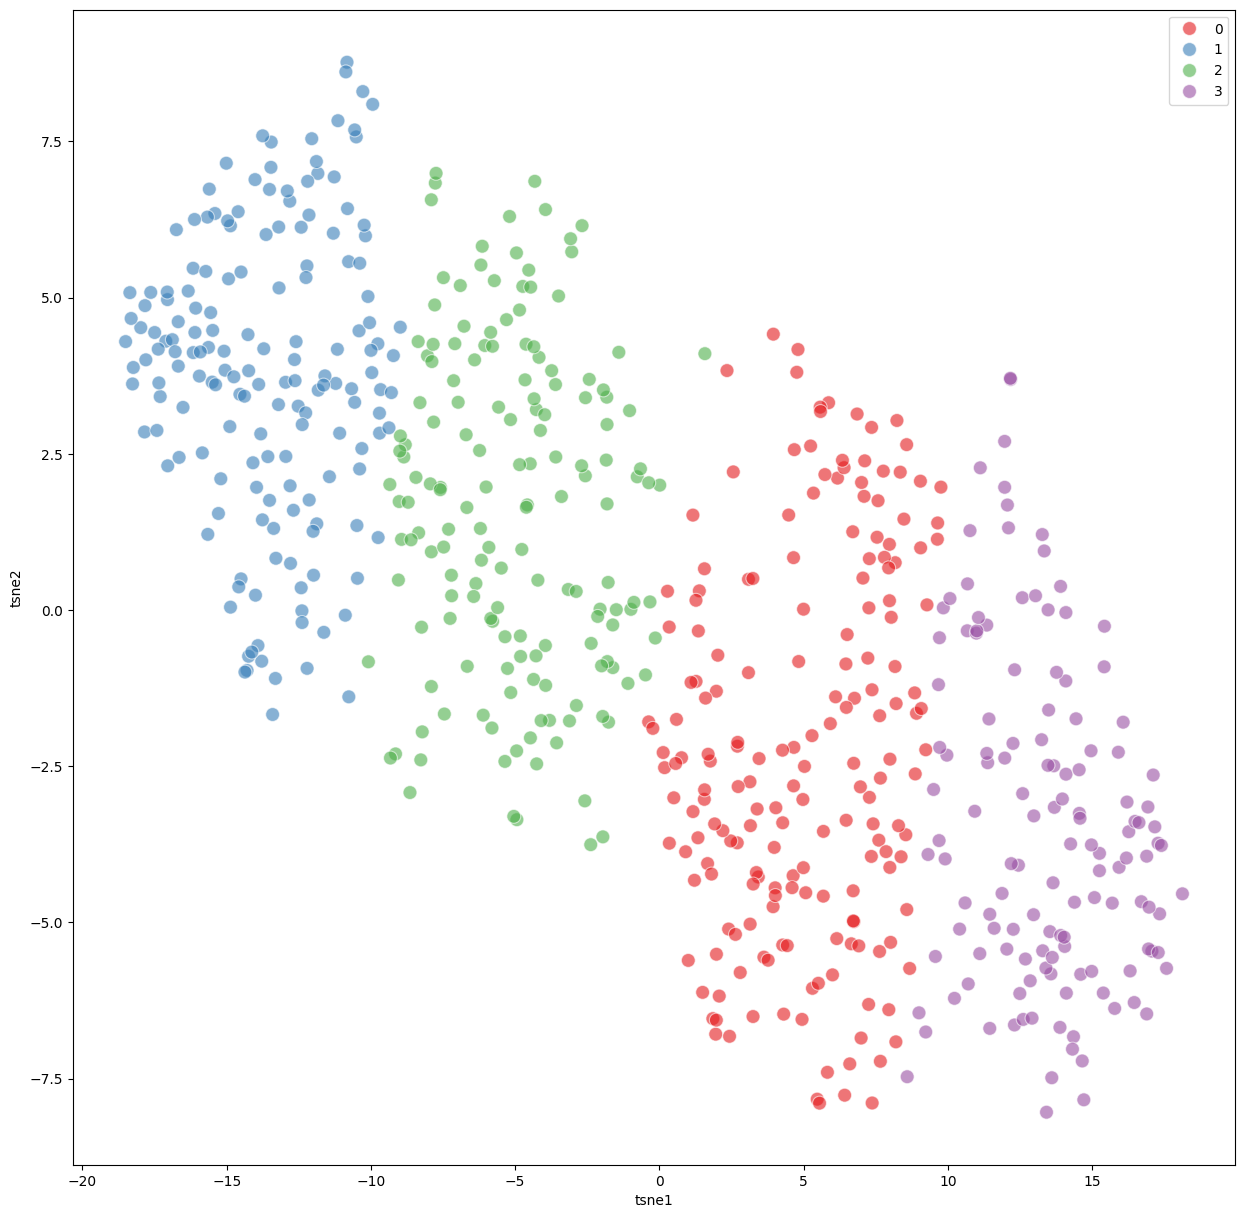

In [131]:
plt.figure(figsize = (15,15))
# Pass data as a single argument and specify x and y columns using keyword arguments
sns.scatterplot(data=clusters_tsne_scale, x='tsne1', y='tsne2', hue='tsne_clusters', palette='Set1', s=100, alpha=0.6)   #.set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [132]:
Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [133]:
import plotly.graph_objs as go
import plotly.io as pio

# Optional: sets rendering in browser if you're in Jupyter or non-Notebook
# pio.renderers.default = 'browser'  # or 'notebook' or 'iframe'

# Assumes: clusters_tsne_scale is a DataFrame with t-SNE components
#          labels_tsne_scale is a 1D array-like of labels (e.g., cluster or class labels)

trace = go.Scatter3d(
    x=clusters_tsne_scale.iloc[:, 0],
    y=clusters_tsne_scale.iloc[:, 1],
    z=clusters_tsne_scale.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_tsne_scale,  # coloring by label
        colorscale='Viridis',     # better perceptual colorscale
        opacity=0.7,
        line=dict(color='black', width=0.5)  # subtle border
    )
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='tsne1'),
        yaxis=dict(title='tsne2'),
        zaxis=dict(title='tsne3')
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    height=800,
    width=800
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [134]:
df_c["tSNE2_labels"] = labels_tsne_scale

df_c.head()
df_c.to_csv("/content/drive/MyDrive/Thesis-work_overall/Overall_Ranking_6metrics/tSNE2_clustered_full_dataset.csv", index=False)

In [135]:
df_c.to_csv("/content/drive/MyDrive/Thesis-work_overall/Overall_Ranking_6metrics/Dataset-644-CS-overallJournals.csv", index=False)